 # Problem Set One

1) LOdd1Three0 : Set of strings over {0,1} with an odd # of 1s OR exactly three 0s. 

* Hint on how to arrive at the language:

  - develop NFAs for the two cases and perform their union. Obtain DFA

  - develop REs for the two cases and perform the union. 

  - Testing the creations:

    .   Come up with language for even # of 1s and separately for "other than three 0s". 
 
    .   Do two intersections. 
 
    .   Is the language empty?


2) Language of strings over {0,1} with exactly two occurrences of 0101 in it.

 * Come up with it directly (take overlaps into account, i.e. 010101 has two occurrences in it

 * Come up in another way

Notes:

* Most of the problem students will have in this course is interpreting English (technical English)

* So again, read the writeup at the beginning of Module6 (should be ready soon today) and work on using the tool.





In [1]:
      

from Imports.Module5_RE  import re2nfa
from Imports.Module4_NFA import min_dfa_brz, nfa2dfa
from Imports.Module3_DFA import min_dfa, langeq_dfa, iso_dfa, pruneUnreach
from Imports.Module3_DFA import union_dfa, intersect_dfa, totalize_dfa
from Imports.DotBashers  import dotObj_dfa 

 


The DFA are NOT language equivalent!
Path leading to counterexample is: 
[(('IF', 'IF'), ('IF', 'IF')), (('A', 'A'), ('A', 'A')), (('B', 'B'), ('B', 'B'))]

Q: {'I', 'S1', 'S0', 'S2', 'F'}
Sigma: {'1', '0'}
Q0: {'I'}
F: {'F'}
Delta:
I	S1	S0	S2	F
---------------------------------------------
{'S0', 'I'}	{'S2'}	{'S1'}	{'F'}	set()		1

{'S0'}	set()	set()	set()	set()		

{'I'}	{'S2'}	set()	{'F'}	set()		0

States reached =  {'A1'}
States reached =  {'S1', 'S0', 'I'}
States reached =  {'S2', 'S0', 'I'}
States reached =  {'S0', 'F', 'I'}
States reached =  {'S0', 'I'}
States reached =  {'S0', 'I'}
States reached =  {'S1', 'S0', 'I'}
States reached =  {'I', 'S2', 'S0', 'S1'}
States reached =  {'I', 'S2', 'S0', 'F'}
NFA rejects ''
States reached =  {'S0', 'I'}
NFA rejects '0'
States reached =  {'S1', 'S0', 'I'}
States reached =  {'S2', 'S0', 'I'}
States reached =  {'S0', 'F', 'I'}
NFA accepts '100' by reaching {'S0', 'F', 'I'}


Generating LALR tables


__Solutions__

1) LOdd1Three0 : Set of strings over {0,1} with an odd # of 1s OR exactly three 0s. 

* Hint on how to arrive at the language:

  - develop NFAs for the two cases and perform their union. Obtain DFA

  - develop REs for the two cases and perform the union. 

  - Testing the creations:

    .   Come up with language for even # of 1s and separately for "other than three 0s". 
 
    .   Do two intersections. 
 
    .   Is the language empty?


2) Language of strings over {0,1} with exactly two occurrences of 0101 in it.

 * Come up with it directly (take overlaps into account, i.e. 010101 has two occurrences in it

 * Come up in another way

Notes:

* Most of the problem students will have in this course is interpreting English (technical English)

* So again, read the writeup at the beginning of Module6 (should be ready soon today) and work on using the tool.





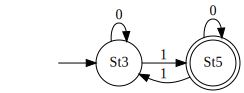

In [2]:
RE_Odd1s  = "0* 1 0* (1 0* 1 0*)*"
NFA_Odd1s = re2nfa(RE_Odd1s)
DO_Odd1s  = dotObj_dfa(min_dfa(nfa2dfa(NFA_Odd1s)))
DO_Odd1s

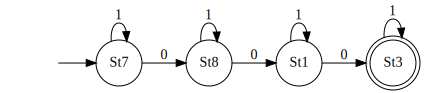

In [3]:
RE_Ex3z = "1* 0 1* 0 1* 0 1* "
NFA_Ex3z = re2nfa(RE_Ex3z)
DO_Ex3z  = dotObj_dfa(min_dfa(nfa2dfa(NFA_Ex3z)))
DO_Ex3z

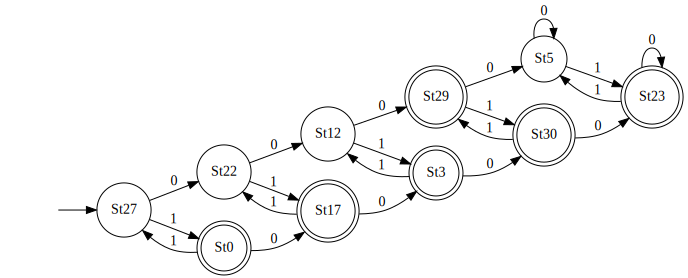

In [4]:
RE_O13z  = "0* 1 0* (1 0* 1 0*)* + 1* 0 1* 0 1* 0 1* "
NFA_O13z = re2nfa(RE_O13z)
MD_O13z  = min_dfa(nfa2dfa(NFA_O13z))
DO_O13z  = dotObj_dfa(MD_O13z)
DO_O13z

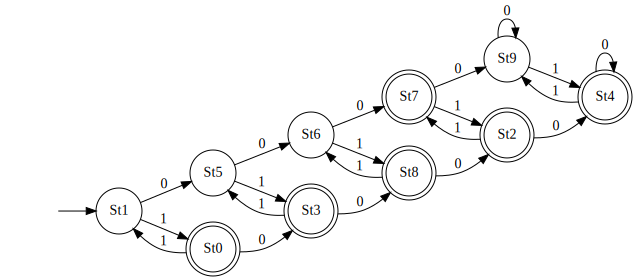

In [5]:
RE_O13z  = "0* 1 0* (1 0* 1 0*)* + 1* 0 1* 0 1* 0 1* "
NFA_O13z = re2nfa(RE_O13z)
NMD_O13z  = nfa2dfa(NFA_O13z)
MD_O13zB  = min_dfa_brz(NMD_O13z)
DO_O13zB  = dotObj_dfa(MD_O13zB)
DO_O13zB

In [6]:
iso_dfa(MD_O13z,MD_O13zB)

True

In [7]:
langeq_dfa(NMD_O13z,MD_O13z)

True

In [8]:
iso_dfa(NMD_O13z, MD_O13z)

False

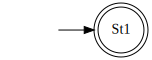

In [9]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("''"))))

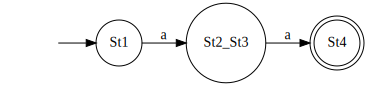

In [10]:
D1 = min_dfa(nfa2dfa(re2nfa("aa")))
dotObj_dfa(D1)

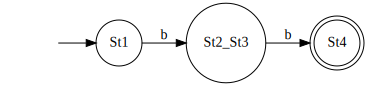

In [11]:
D2 = min_dfa(nfa2dfa(re2nfa("bb")))
dotObj_dfa(D2)

In [12]:
D1

{'Delta': {('BH', 'a'): 'BH',
  ("{'St1'}", 'a'): "{'St2', 'St3'}",
  ("{'St2', 'St3'}", 'a'): "{'St4'}",
  ("{'St4'}", 'a'): 'BH'},
 'F': {"{'St4'}"},
 'Q': {'BH', "{'St1'}", "{'St2', 'St3'}", "{'St4'}"},
 'Sigma': {'a'},
 'q0': "{'St1'}"}

In [13]:
D2

{'Delta': {('BH', 'b'): 'BH',
  ("{'St1'}", 'b'): "{'St2', 'St3'}",
  ("{'St2', 'St3'}", 'b'): "{'St4'}",
  ("{'St4'}", 'b'): 'BH'},
 'F': {"{'St4'}"},
 'Q': {'BH', "{'St1'}", "{'St2', 'St3'}", "{'St4'}"},
 'Sigma': {'b'},
 'q0': "{'St1'}"}

Union on DFA with different alphabets.
Making alphabets the same (taking unions).


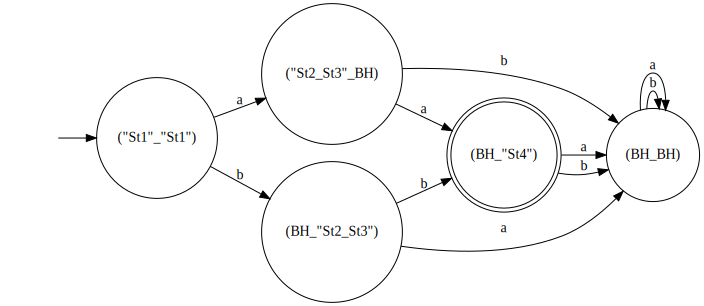

In [14]:
D1or2 = min_dfa(union_dfa(D1,D2))
D1or2p = pruneUnreach(D1or2)
dotObj_dfa(D1or2)

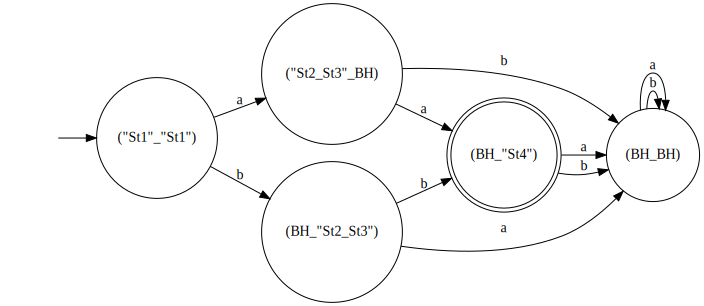

In [15]:
dotObj_dfa(D1or2p)

Intersection on DFA with different alphabets.
Making alphabets the same (taking unions).


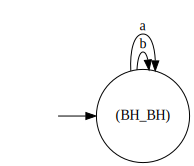

In [16]:
D1and2 = min_dfa(intersect_dfa(D1,D2))
D1and2p = pruneUnreach(D1and2)
dotObj_dfa(D1and2)

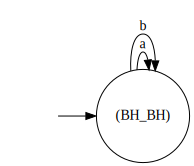

In [17]:
dotObj_dfa(D1and2p)

In [18]:
d1=nfa2dfa(re2nfa("abcde"))
d2=nfa2dfa(re2nfa("abced"))
langeq_dfa(d1,d2,True)

The DFA are NOT language equivalent!
Path leading to counterexample is: 
[("{'St1'}", "{'St1'}"), ("{'St2', 'St3'}", "{'St2', 'St3'}"), ("{'St4', 'St5'}", "{'St4', 'St5'}"), ("{'St6', 'St7'}", "{'St6', 'St7'}"), ("{'St8', 'St9'}", 'BH'), ("{'St10'}", 'BH')]


False

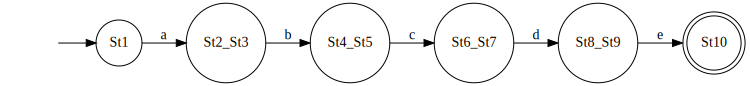

In [19]:
dotObj_dfa(d1)

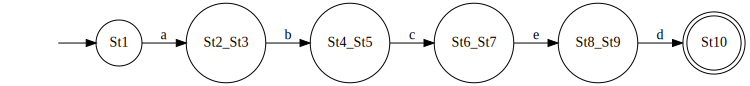

In [20]:
dotObj_dfa(d2)

In [21]:
d1a=nfa2dfa(re2nfa("aa*+bc"))
d2a=nfa2dfa(re2nfa("a(a*+bc)"))
langeq_dfa(d1a,d2a,True)

The DFA are NOT language equivalent!
Path leading to counterexample is: 
[('St5', 'St5'), ('St3', 'BH'), ('St2', 'BH')]


False

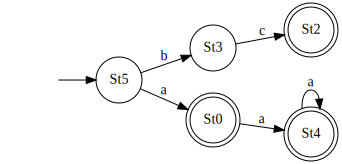

In [22]:
dotObj_dfa(d1a)

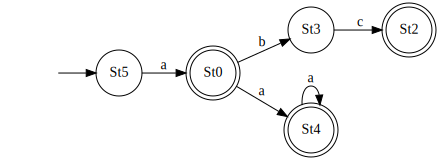

In [23]:
dotObj_dfa(d2a)

In [24]:
d1b=nfa2dfa(re2nfa("aaa*+aa*bc+bcaa*+bcbc"))
d2b=nfa2dfa(re2nfa("(aa*+bc)(aa*+bc)"))
langeq_dfa(d1b,d2b,True)

True

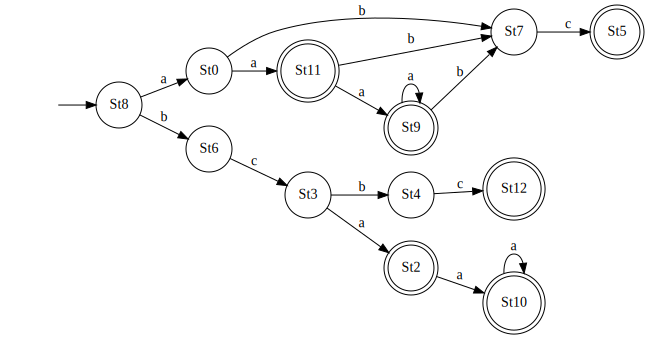

In [25]:
dotObj_dfa(d1b)

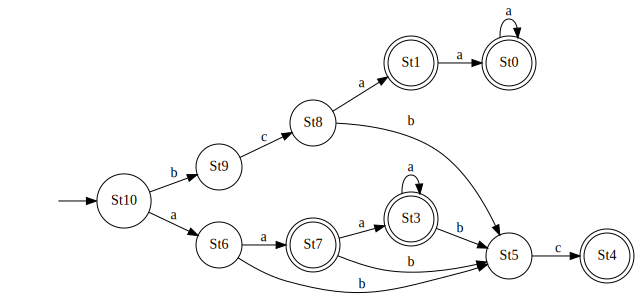

In [26]:
dotObj_dfa(d2b)

In [27]:
iso_dfa(d1b,d2b)

False

In [28]:
d1c=min_dfa(d1b)

In [29]:
d2c=min_dfa(d2b)

In [30]:
iso_dfa(d1c,d2c)

True

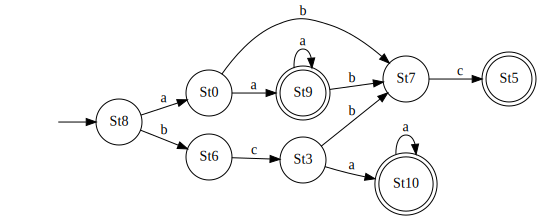

In [31]:
dotObj_dfa(d1c)

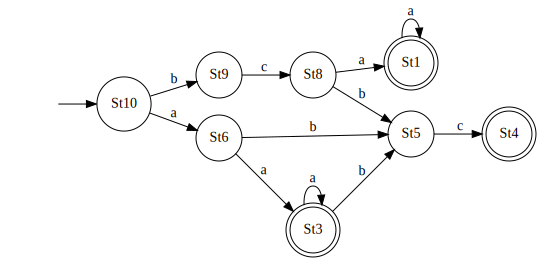

In [32]:
dotObj_dfa(d2c)

In [33]:
d1d=nfa2dfa(re2nfa("aaa*+aa*bc+bcaaa*+bcbc"))
d2d=nfa2dfa(re2nfa("(aa*+bc)(aa*+bc)"))
langeq_dfa(d1d,d2d,True)

The DFA are NOT language equivalent!
Path leading to counterexample is: 
[('St10', 'St10'), ('St3', 'St9'), ('St7', 'St8'), ('St1', 'St1')]


False

In [34]:
d1d=nfa2dfa(re2nfa("a a a*+a a* b c+ b c a a a*+b c b c"))
d2d=nfa2dfa(re2nfa("(a a*+b c)(a a*+b c)"))
langeq_dfa(d1d,d2d,True)

The DFA are NOT language equivalent!
Path leading to counterexample is: 
[('St10', 'St10'), ('St3', 'St9'), ('St7', 'St8'), ('St1', 'St1')]


False

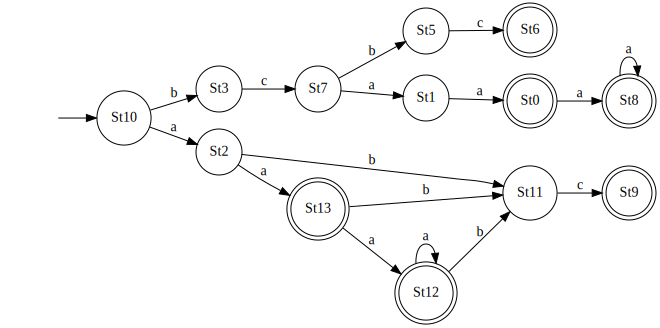

In [35]:
dotObj_dfa(d1d)

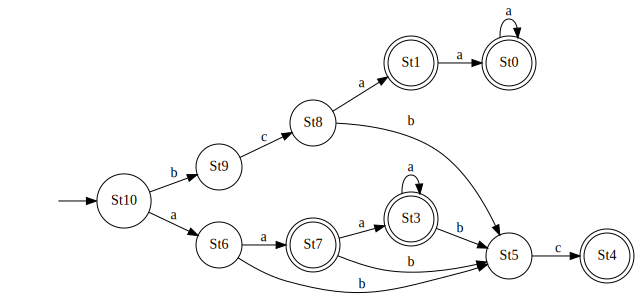

In [36]:
dotObj_dfa(d2d)

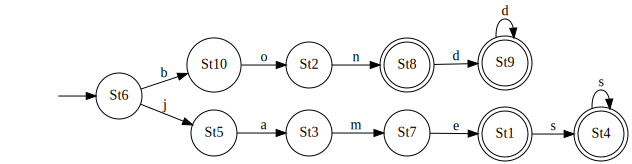

In [37]:
d1d=nfa2dfa(re2nfa("james*+bond*"))
dotObj_dfa(d1d)

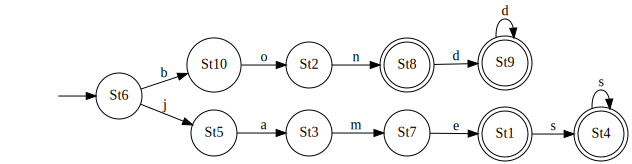

In [39]:
d1d=nfa2dfa(re2nfa("ja mes*+bo nd*"))
dotObj_dfa(d1d)

In [ ]:
d1d=nfa2dfa(re2nfa(" "))
dotObj_dfa(d1d)